In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc: {}, test acc: {}".format(train_acc, test_acc))


train acc: 0.10441666666666667, test acc: 0.1028
train acc: 0.7917666666666666, test acc: 0.7953
train acc: 0.8799166666666667, test acc: 0.8837
train acc: 0.8973833333333333, test acc: 0.9007
train acc: 0.9084666666666666, test acc: 0.911
train acc: 0.91445, test acc: 0.918
train acc: 0.91995, test acc: 0.9223
train acc: 0.9239666666666667, test acc: 0.926
train acc: 0.9279333333333334, test acc: 0.9299
train acc: 0.9312333333333334, test acc: 0.9331
train acc: 0.9331166666666667, test acc: 0.9337
train acc: 0.9359166666666666, test acc: 0.9353
train acc: 0.9387333333333333, test acc: 0.9383
train acc: 0.9410166666666666, test acc: 0.9389
train acc: 0.9425833333333333, test acc: 0.9425
train acc: 0.9443, test acc: 0.9433
train acc: 0.9456333333333333, test acc: 0.9443


In [3]:
from matplotlib import pyplot as plt

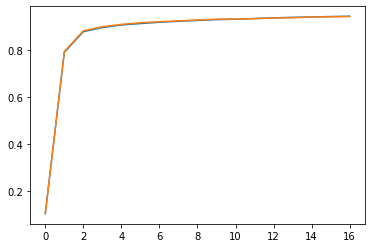

In [6]:
plt.plot(train_acc_list)
plt.plot(test_acc_list)

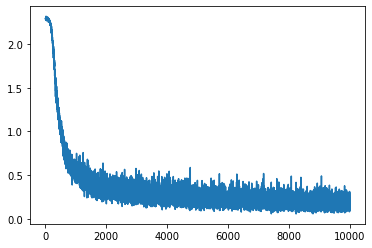

In [7]:
plt.plot(train_loss_list)